# Run Script for Memory Leak and Workflow Envs
**Use this format for date: 2021-08-01T00:00:00.000Z**

In [122]:
exec(open('/home/jovyan/personal/Ray/rays-space/Access Logs/memory_analysis2.py').read())
#results2.loc[results2['min'] <= .3].sort_values('min')
results.head(10)

snowflake password:


 ·········


Client Name and Env


 axa-production


Start Date:


 2021-08-01T00:00:00.000Z


End Date:


 2021-09-01T00:00:00.000Z


client         env                date                 request_type  \
0    axa  production 2021-08-17 04:34:00  Create Module Submission(s)   
1    axa  production 2021-08-20 20:12:00  Create Module Submission(s)   
2    axa  production 2021-08-28 00:38:00  Create Module Submission(s)   
3    axa  production 2021-08-25 02:42:00  Create Module Submission(s)   
4    axa  production 2021-08-27 12:16:00  Create Module Submission(s)   
5    axa  production 2021-08-06 20:56:00  Create Module Submission(s)   
6    axa  production 2021-08-24 18:32:00  Create Module Submission(s)   
7    axa  production 2021-08-31 12:50:00  Create Module Submission(s)   
8    axa  production 2021-08-27 23:40:00  Create Module Submission(s)   
9    axa  production 2021-08-06 21:36:00  Create Module Submission(s)   

                   moduleid workflowid target_status_code request_method  \
0  60e87b24ba6b9902e9d99ad2       None                201           POST   
1  60e87b24ba6b9902e9d99ad2       None                201           POST   
2  60e87b24ba6b9902e9d99ad2       None                201           POST   
3  60e87b24ba6b9902e9d99ad2       None                201           POST   
4  60e87b24ba6b9902e9d99ad2       None                201           POST   
5  60e87b24ba6b9902e9d99ad2       None                201           POST   
6  60e87b24ba6b9902e9d99ad2       None                201           POST   
7  60e87b24ba6b9902e9d99ad2       None                201           POST   
8  60e87b24ba6b9902e9d99ad2       None                201           POST   
9  60e87b24ba6b9902e9d99ad2       None                201           POST   

   req_count   rb_50  ...  comp_count  plug_count  dwf_count  sub_count  \
0          1  1868.0  ...        1318           3         38       5414   
1          2  1906.5  ...        1318           3         38       5414   
2          4  1980.0  ...        1318           3         38       5414   
3          1  2043.0  ...        1318           3         38       5414   
4          1  2126.0  ...        1318           3         38       5414   
5          1  1876.0  ...        1318           3         38       5414   
6          2  1570.5  ...        1318           3         38       5414   
7          1  1893.0  ...        1318           3         38       5414   
8          1  2112.0  ...        1318           3         38       5414   
9          3  2152.0  ...        1318           3         38       5414   

   node_count  timerstart_count  target_status_code2  pt_cat  sb_cat  \
0           0                 0                    2  Medium  Medium   
1           0                 0                    2  Medium  Medium   
2           0                 0                    2  Medium  Medium   
3           0                 0                    2  Medium  Medium   
4           0                 0                    2  Medium  Medium   
5           0                 0                    2  Medium  Medium   
6           0                 0                    2  Medium  Medium   
7           0                 0                    2  Medium  Medium   
8           0                 0                    2  Medium  Medium   
9           0                 0                    2  Medium  Medium   

  total_count  
0        3345  
1        3345  
2        3345  
3        3345  
4        3345  
5        3345  
6        3345  
7        3345  
8        3345  
9        3345  

[10 rows x 22 columns]

# Chart Stuff
**Used for charting various request types against free memory**

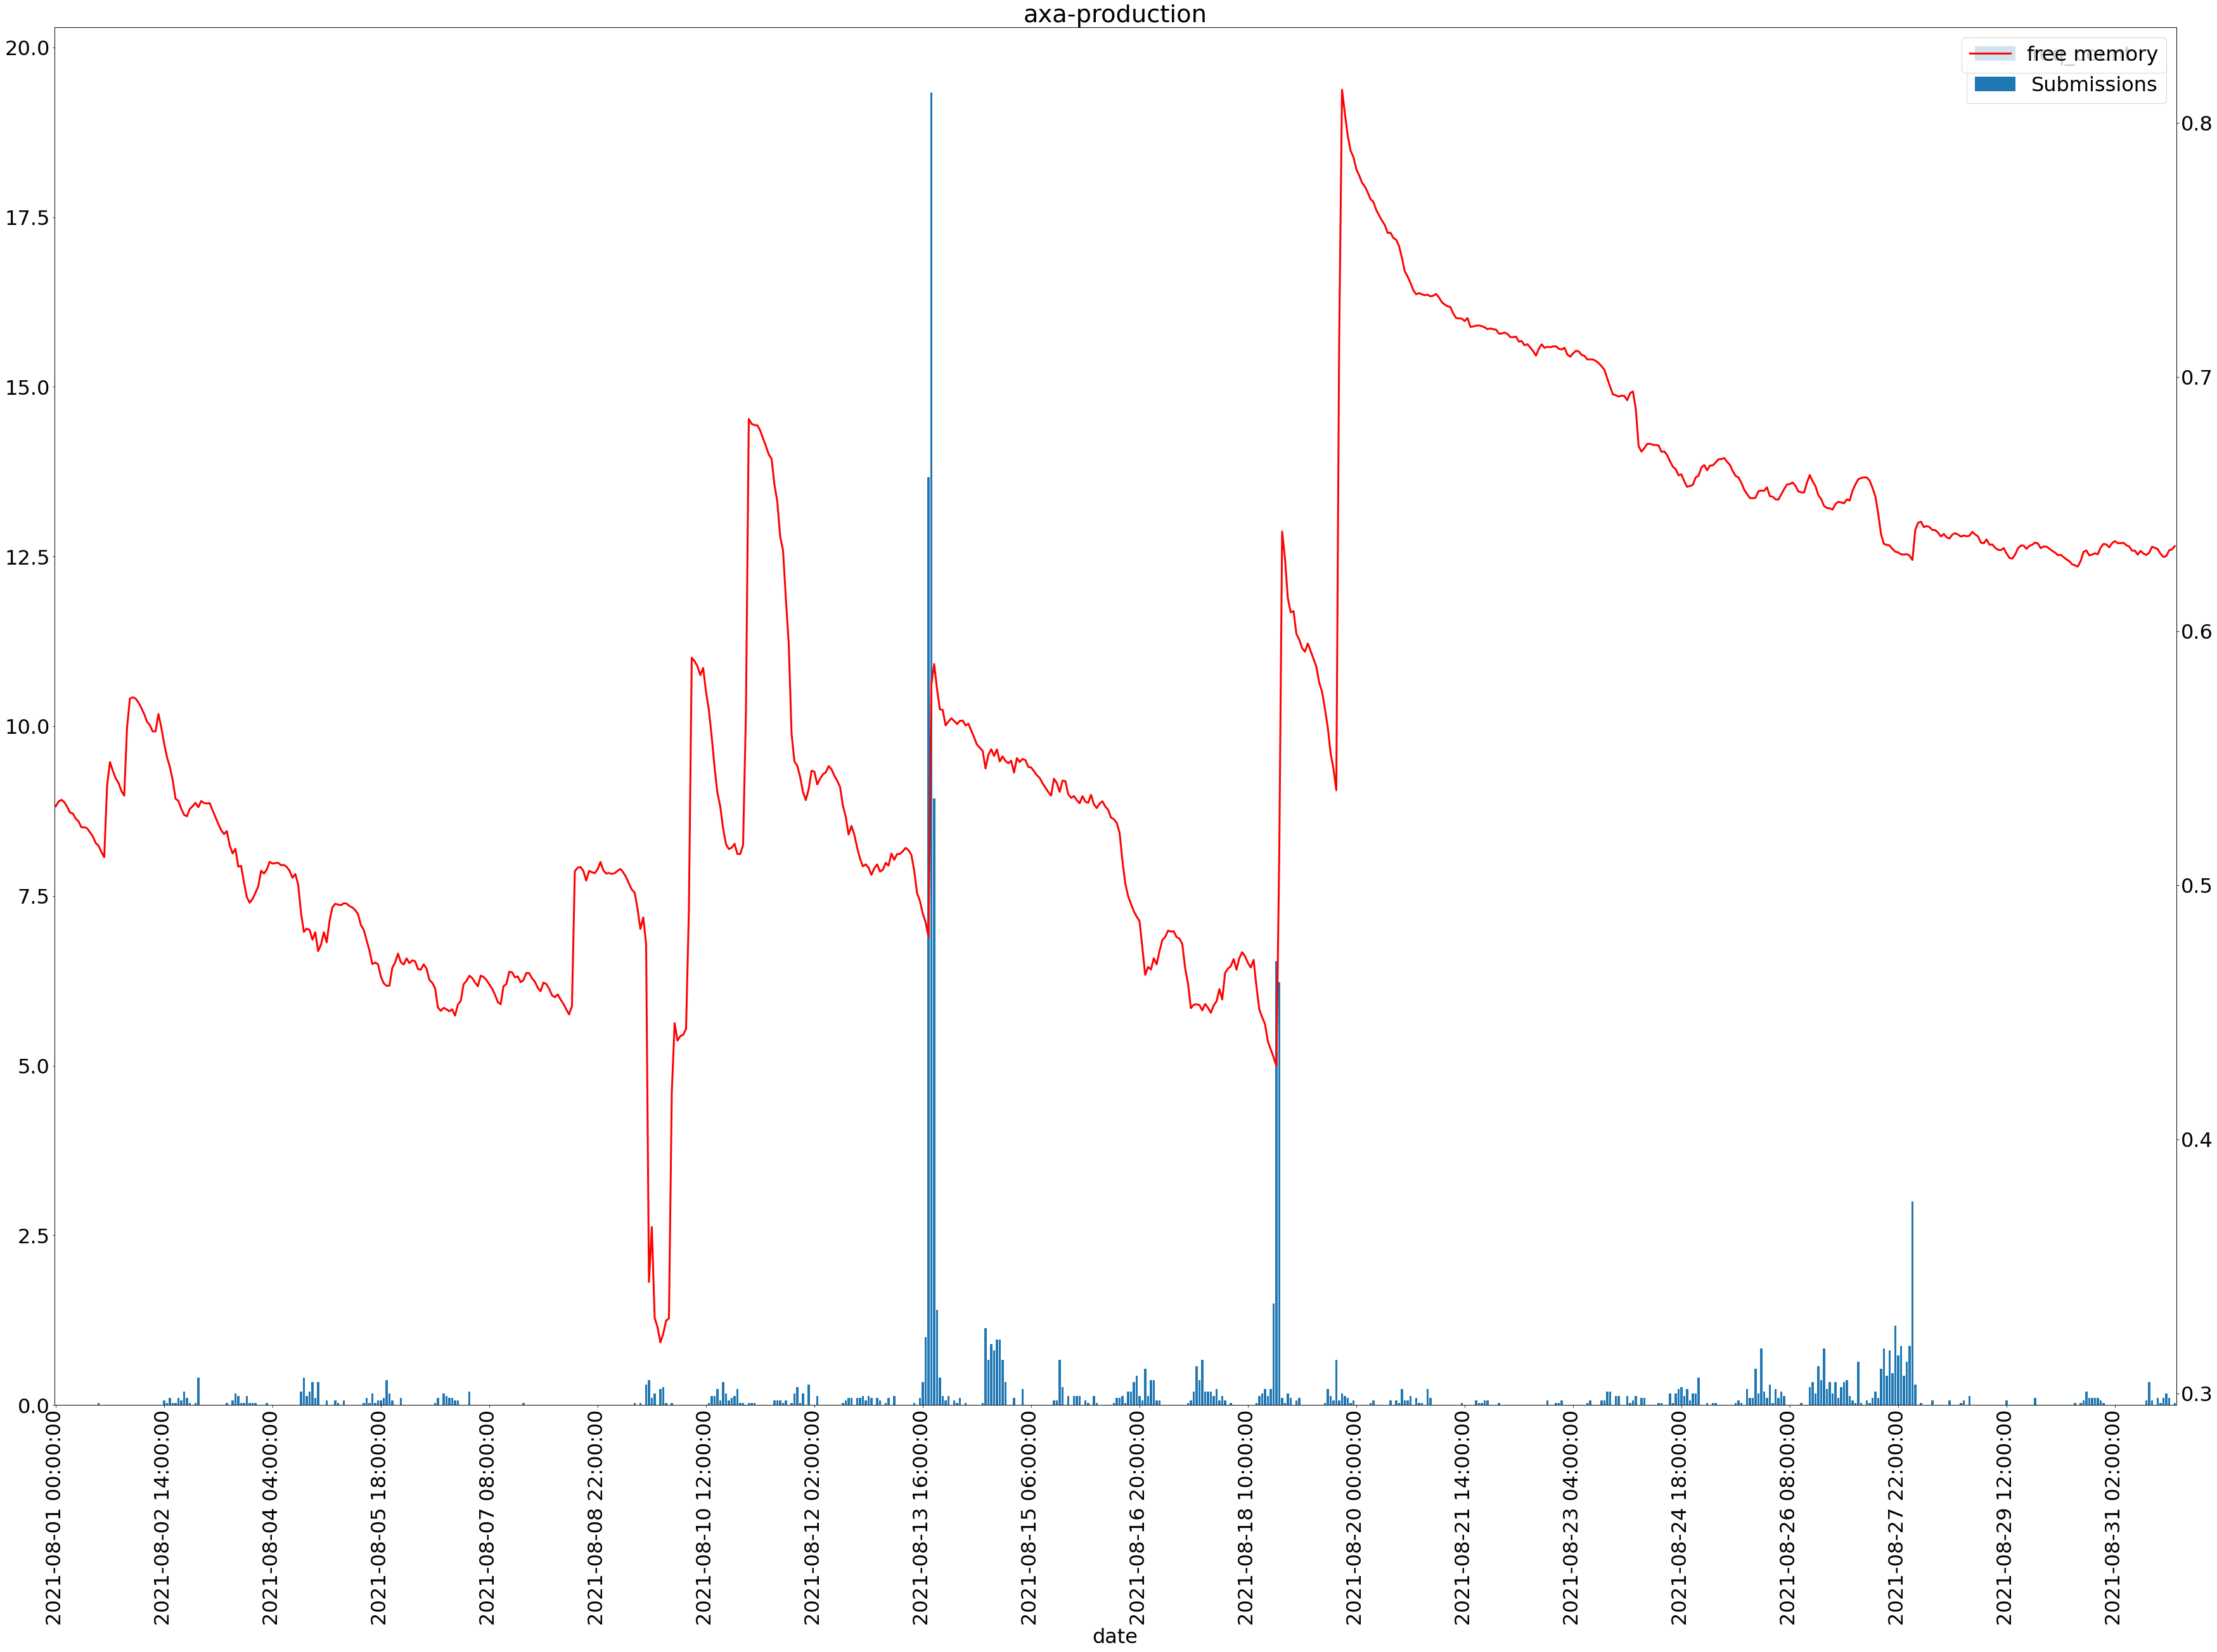

In [204]:
"""
chart = results2.groupby(['client','env',pd.Grouper(key='date',freq='8h')]).agg({value+'_total_rolling':'mean','freeMem_rolling':'mean',
            value+'_4_rolling':'mean',value+'_2_rolling':'mean',value+'_total_std':'mean'}).reset_index()
chart.set_index('date')[[value + '_total_rolling']].plot(kind='bar',label='submissions')
"""
rtype = 'Execute Module'
req_list = list(results.request_type.unique())
status_list = list(results.target_status_code2.unique())
M = 0
req_list = [x for x in req_list if x=='Execute Module']
#req_list = [x for x in req_list if 'Other' in x or 'Module' in x or 'Workflow' in x or 'PDF' in x or 'CSV' in x]
status_list = [x for x in status_list if x in ['-']]
chart = results.loc[(results.request_type.isin(req_list))&(results.target_status_code2.isin(status_list))&(results.pt_50>=M)].groupby(['client',
    'env','date']).req_count.sum().reset_index()
#chart = results.loc[results.combined.isin(regdata.combined)].groupby(['client','env','date']).req_count.mean().reset_index()
chart = chart.merge(mem, on = ['client','env','date'],how='right').fillna(0)
chart = chart.groupby(['client','env',pd.Grouper(key='date',freq='1h')]).agg({'req_count':'mean','freeMem':'mean'}).reset_index()
#chart.set_index('date')[[value + '_total_rolling']].plot(kind='bar',label='submissions')
chart.set_index('date')[['req_count']].plot(kind='bar',legend=False)
#chart = chart.set_index('date')
plt.bar(chart.index,chart.req_count, label='Submissions')
plt.rcParams["figure.figsize"] = (60,40)
plt.rcParams.update({'font.size': 32})
plt.xticks(rotation=90)
plt.legend(loc=0)
plt.locator_params(axis="x", nbins=20)
#plt.grid()
plt2 = plt.twinx()
#plt2.plot(chart.index,chart.freeMem.shift(-3),linewidth=2,color='darkorange',label='free memory')
plt2.plot(chart.index,chart.freeMem.shift(0),linewidth=3,color='red',label='free memory')
plt.title(list(mem.client_env.unique())[0])
plt2.legend(loc=1)
plt.show()

# Regression by ModuleId
**This is deprecated and will be replace by module KPIs**

In [62]:
N=10
K=1
values=['req_count']
dep_var = 'freeMem_rolling_diff'
columns = ['target_status_code2','request_type','moduleid','pt_cat']
results3 = pd.pivot_table(results.loc[results.total_count>=K], values=values, index=['client','env','date'], 
        columns=columns, aggfunc='sum').fillna(0).reset_index()
cols = results3.columns
cols = [re.sub('---','-','-'.join(x)) for x in cols]
cols = [x.rstrip('-') for x in cols]
results3.columns = cols
results3 = results3.merge(mem, on = ['client','env','date'])
results3 = results3.rename(columns=lambda x: re.sub('-','_',x))
cols2 = [x for x in results3.columns if x not in ['client','env','date','client_env']]
rollnames = [x + '_rolling' for x in cols2]
results3[rollnames] = results3[cols2].rolling(N).mean()
std_vars = [x + '_std' for x in cols2]
results3[std_vars] = results3[cols2].rolling(N).std()
results3 = results3.loc[np.logical_not(results3.freeMem_rolling.isna())]
diff_vars = [x + '_diff' for x in rollnames]
results3[diff_vars] = results3[rollnames].apply(lambda x: x/x.shift(1)-1).fillna(0)

results3 = results3.rename(columns=lambda x: re.sub(' ','_',x))
results3 = results3.rename(columns=lambda x: re.sub('[()]','',x))
reg_vars = [x for x in results3.columns if x not in ['client','env','date','client_env'] and 'freeMem' not in x]
reg_vars = [x for x in reg_vars if '_diff' in x]
results3 = results3.fillna(0)
results3.replace([np.inf, -np.inf], 0, inplace=True)
agg_dict = dict(zip(reg_vars+[dep_var],['mean']*len(reg_vars+[dep_var])))
results4 = results3.groupby(['client','env',pd.Grouper(key='date',freq='60min')]).agg(agg_dict)
#results4['outlier'] = iso.fit_predict(results4[reg_vars])
#reg_vars = reg_vars + ['outlier']
r2max = []
for rv in reg_vars:
    reg1 = sm.ols(dep_var + '~' + rv,data=results4).fit()
    r2 = reg1.rsquared
    r2max.append(r2)

used_vars = [reg_vars[i] for i in range(0,len(r2max)) if r2max[i]==max(r2max)]
reg_vars = [x for x in reg_vars if x not in used_vars]

reg2 = sm.ols(dep_var + '~' + '+'.join(used_vars),data=results4).fit()
aicdiff = 2

while aicdiff>=2 and len(reg_vars)>=1:
    aicmin = []
    for rv in reg_vars:
        reg1 = sm.ols(dep_var + '~' + '+'.join(used_vars + [rv]),data=results4).fit()
        aic = reg1.aic
        aicmin.append(aic)
    used_vars = used_vars + [reg_vars[i] for i in range(0,len(aicmin)) if aicmin[i]==min(aicmin)]
    reg_vars = [x for x in reg_vars if x not in used_vars]
    reg = sm.ols(dep_var + '~' + '+'.join(used_vars),data=results4).fit()
    aicdiff = reg2.aic - reg.aic
    reg2 = reg

pvals = list(reg.pvalues)
rm1 = [used_vars[i] for i in range(0,len(pvals[1:])) if pvals[1:][i]>.1]
used_vars = [x for x in used_vars if x not in rm1]
results4['outlier'] = iso.fit_predict(results4[used_vars])
reg = sm.ols(dep_var + '~' + '+'.join(used_vars+['outlier']),data=results4).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     freeMem_rolling_diff   R-squared:                       0.848
Model:                              OLS   Adj. R-squared:                  0.833
Method:                   Least Squares   F-statistic:                     56.23
Date:                  Thu, 07 Oct 2021   Prob (F-statistic):          9.27e-233
Time:                          16:44:23   Log-Likelihood:                 5144.2
No. Observations:                   744   AIC:                        -1.015e+04
Df Residuals:                       676   BIC:                            -9839.
Df Model:                            67                                         
Covariance Type:              nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                2.742e-05   4.72e-05      0.581      0.562   -6.53e-05       0.000
req_count_5_module_None_High_rolling_diff                                                  -0.0569      0.002    -25.366      0.000      -0.061      -0.052
req_count_2_query_None_Low_rolling_diff                                                    -0.0077      0.001    -12.131      0.000      -0.009      -0.006
req_count_4_Execute_Module_5f3fdc114b0b73020fb30cbc_High_rolling_diff                      -0.0626      0.004    -16.361      0.000      -0.070      -0.055
req_count_5_Execute_Module_5ef6bd576ce5870206cc869f_High_rolling_diff                      -0.0245      0.003     -7.212      0.000      -0.031      -0.018
req_count_2_Execute_Module_5f3c57894b0b73020fb308b4_Medium_rolling_diff                     0.0122      0.001      9.337      0.000       0.010       0.015
req_count_5_Execute_Module_5f2d73c0c29a6234eb94f2f2_High_rolling_diff                      -0.0419      0.004    -11.596      0.000      -0.049      -0.035
req_count_5_Other_None_High_rolling_diff                                                   -0.0326      0.004     -7.786      0.000      -0.041      -0.024
req_count_Execute_Module_5f34430c0aa6630216a27b8c_Low_rolling_diff                         -0.0173      0.002     -8.884      0.000      -0.021      -0.013
req_count_4_Execute_Module_5ebd4e26e416a201fabb4c12_High_rolling_diff                      -0.0173      0.002     -8.884      0.000      -0.021      -0.013
req_count_5_Execute_Module_5ef22a4a84426a0206622b0d_High_rolling_diff                      -0.0173      0.002     -8.884      0.000      -0.021      -0.013
req_count_2_Update_Module_Submission_5e7bb5e1d7c4360213d36d6e_Medium_rolling_diff          -0.0019      0.000     -6.109      0.000      -0.002      -0.001
req_count_5_Execute_Form_None_Medium_rolling_diff                                          -0.0626      0.008     -8.209      0.000      -0.078      -0.048
req_count_2_Update_Module_Submission_5f2453461dc28e368dbfd9dd_High_rolling_diff            -0.0312      0.009     -3.569      0.000      -0.048      -0.014
req_count_2_List_Submissions_for_Dashboard_5e7bb5e1d7c4360213d36d6e_Medium_rolling_diff     0.0011      0.000      2.574      0.010       0.000       0.002
req_count_4_Execute_Module_5ef79af49b2a5a0206de40d5_High_rolling_diff                      -0.0472      0.006     -8.341      0.000      -0.058      -0.036
req_count_5_Execute_Module_5ef6bd576ce5870206cc869f_Medium_rolling_diff                    -0.031

# Regression with Module and Workflow KPIs
**Current Model**

In [121]:
N=10
K=1
values=['req_count']
dep_var = 'freeMem_rolling_diff'
columns = ['target_status_code2','request_type']
indexes = ['client','env','date']
results3 = pd.pivot_table(results.loc[results.total_count>=K], values=values, index=indexes, 
        columns=columns, aggfunc='sum').fillna(0).reset_index()
cols = results3.columns
cols = [re.sub('---','-','-'.join(x)) for x in cols]
cols = [x.rstrip('-') for x in cols]
results3.columns = cols
results3 = results3.merge(mem, on = ['client','env','date'])
results3 = results3.rename(columns=lambda x: re.sub('-','_',x))

values2 = ['pt_50','sb_50','rb_50','comp_count','plug_count','dwf_count','sub_count','node_count','timerstart_count']
results3a = results.groupby(indexes).agg(dict(zip(values2,[['min','max']]*len(values2)))).fillna(0).reset_index()
cols = results3a.columns
cols = [re.sub('---','-','-'.join(x)) for x in cols]
cols = [x.rstrip('-') for x in cols]
results3a.columns = cols
results3 = results3.merge(results3a)
results3 = results3.rename(columns=lambda x: re.sub('-','_',x))

cols2 = [x for x in results3.columns if x not in ['client','env','date','client_env']]
rollnames = [x + '_rolling' for x in cols2]
results3[rollnames] = results3[cols2].rolling(N).sum()
results3 = results3.loc[np.logical_not(results3.freeMem_rolling.isna())]
diff_vars = [x + '_diff' for x in rollnames]
results3[diff_vars] = results3[rollnames].apply(lambda x: x/x.shift(1)-1).fillna(0)
results3 = results3.rename(columns=lambda x: re.sub(' ','_',x))
results3 = results3.rename(columns=lambda x: re.sub('[()]','',x))

reg_vars = [x for x in results3.columns if x not in ['client','env','date','client_env'] and 'freeMem' not in x]
reg_vars = [x for x in reg_vars if '_diff' in x]
results3 = results3.fillna(0)
results3.replace([np.inf, -np.inf], 0, inplace=True)
agg_dict = dict(zip(reg_vars+[dep_var],['mean']*len(reg_vars+[dep_var])))
results4 = results3.groupby(['client','env',pd.Grouper(key='date',freq='60min')]).agg(agg_dict)

#results4[reg_vars] = (results4[reg_vars]-results4[reg_vars].mean())/results4[reg_vars].std()

r2max = []
for rv in reg_vars:
    reg1 = sm.ols(dep_var + '~' + rv,data=results4).fit()
    r2 = reg1.rsquared
    r2max.append(r2)

used_vars = [reg_vars[i] for i in range(0,len(r2max)) if r2max[i]==max(r2max)]
reg_vars = [x for x in reg_vars if x not in used_vars]

reg2 = sm.ols(dep_var + '~' + '+'.join(used_vars),data=results4).fit()
aicdiff = 2

while aicdiff>=2 and len(reg_vars)>=1:
    aicmin = []
    for rv in reg_vars:
        reg1 = sm.ols(dep_var + '~' + '+'.join(used_vars + [rv]),data=results4).fit()
        aic = reg1.aic
        aicmin.append(aic)
    used_vars = used_vars + [reg_vars[i] for i in range(0,len(aicmin)) if aicmin[i]==min(aicmin)]
    reg_vars = [x for x in reg_vars if x not in used_vars]
    reg = sm.ols(dep_var + '~' + '+'.join(used_vars),data=results4).fit()
    aicdiff = reg2.aic - reg.aic
    reg2 = reg

pvals = list(reg.pvalues)
rm1 = [used_vars[i] for i in range(0,len(pvals[1:])) if pvals[1:][i]>.1]
used_vars = [x for x in used_vars if x not in rm1]
results4['outlier'] = iso.fit_predict(results4[used_vars])
reg = sm.ols(dep_var + '~' + '+'.join(used_vars+['outlier']),data=results4).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     freeMem_rolling_diff   R-squared:                       0.497
Model:                              OLS   Adj. R-squared:                  0.487
Method:                   Least Squares   F-statistic:                     50.43
Date:                  Wed, 13 Oct 2021   Prob (F-statistic):           1.06e-96
Time:                          14:48:45   Log-Likelihood:                 4175.3
No. Observations:                   730   AIC:                            -8321.
Df Residuals:                       715   BIC:                            -8252.
Df Model:                            14                                         
Covariance Type:              nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                  -2.251e-06   9.04e-05     -0.025      0.980      -0.000       0.000
req_count_Generate_PDF_from_Template_PDF_Bar_rolling_diff     -0.0555      0.027     -2.074      0.038      -0.108      -0.003
req_count_5_query_rolling_diff                                -0.1919      0.015    -12.508      0.000      -0.222      -0.162
req_count_5_pdf_rolling_diff                                   0.1058      0.016      6.603      0.000       0.074       0.137
req_count_5_Create_Workflow_Submission_rolling_diff            0.2289      0.016     14.171      0.000       0.197       0.261
req_count_5_Execute_Transform_with_Input_Data_rolling_diff    -0.0688      0.015     -4.724      0.000      -0.097      -0.040
sub_count_max_rolling_diff                                    -0.0036      0.001     -3.946      0.000      -0.005      -0.002
req_count_2_Execute_Module_rolling_diff                       -0.0019      0.001     -2.885      0.004      -0.003      -0.001
req_count_Execute_Module_rolling_diff                         -0.0024      0.001     -2.964      0.003      -0.004      -0.001
req_count_4_module_rolling_diff                                0.0035      0.001      2.807      0.005       0.001       0.006
req_count_ping_rolling_diff                                   -0.0143      0.003     -4.543      0.000      -0.020      -0.008
req_count_transform_rolling_diff                              -0.0143      0.003     -4.543      0.000      -0.020      -0.008
req_count_5_Convert_XML_to_JSON_rolling_diff                  -0.0143      0.003     -4.543      0.000      -0.020      -0.008
req_count_5_Execute_Module_rolling_diff                        0.0911      0.014      6.735      0.000       0.065       0.118
req_count_5_NULL_rolling_diff                                  0.0288      0.006      4.543      0.000       0.016       0.041
req_count_5_Other_rolling_diff                                -0.0094      0.002     -5.247      0.000      -0.013      -0.006
req_count_5_datadog_rolling_diff                              -0.0143      0.003     -4.543      0.000      -0.020      -0.008
req_count_5_module_rolling_diff                               -0.1376      0.010    -14.042      0.000      -0.157      -0.118
req_count_5_ping_rolling_diff                                 -0.0143      0.003     -4.543      0.000      -0.020      -0.008
req_count_5_transform_rolling_diff                            -0.0143      0.003     -4.543      0.000      -0.020      -0.008
req_count_logout_rolling_diff                                 -0.0320      0.010     -3.097      0.002      -0.052      -0.012
req_count_cur

In [24]:
N=10
values=['req_count']
dep_var = 'freeMem_rolling_diff'
columns = ['target_status_code2','request_type','moduleid','pt_cat']
results3 = pd.pivot_table(results, values=values, index=['client','env','date'], 
        columns=columns).fillna(0).reset_index()
cols = results3.columns
cols = [re.sub('---','-','-'.join(x)) for x in cols]
cols = [x.rstrip('-') for x in cols]
results3.columns = cols
results3 = results3.merge(mem, on = ['client','env','date'])
results3 = results3.rename(columns=lambda x: re.sub('-','_',x))
cols2 = [x for x in results3.columns if x not in ['client','env','date','client_env']]
rollnames = [x + '_rolling' for x in cols2]
results3[rollnames] = results3[cols2].rolling(N).mean()
std_vars = [x + '_std' for x in cols2]
results3[std_vars] = results3[cols2].rolling(N).std()
results3 = results3.loc[np.logical_not(results3.freeMem_rolling.isna())]
diff_vars = [x + '_diff' for x in rollnames]
results3[diff_vars] = results3[rollnames].apply(lambda x: x/x.shift(1)-1).fillna(0)

results3 = results3.rename(columns=lambda x: re.sub(' ','_',x))
results3 = results3.rename(columns=lambda x: re.sub('[()]','',x))
reg_vars = [x for x in results3.columns if x not in ['client','env','date','client_env'] and 'freeMem' not in x]
reg_vars = [x for x in reg_vars if '_diff' in x]
results3 = results3.fillna(0)
results3.replace([np.inf, -np.inf], 0, inplace=True)
agg_dict = dict(zip(reg_vars+[dep_var],['mean']*len(reg_vars+[dep_var])))
results4 = results3.groupby(['client','env',pd.Grouper(key='date',freq='60min')]).agg(agg_dict)
#results4['outlier'] = iso.fit_predict(results4[reg_vars])
#reg_vars = reg_vars + ['outlier']
r2max = []
for rv in reg_vars:
    reg1 = sm.ols(dep_var + '~' + rv,data=results4).fit()
    r2 = reg1.rsquared
    r2max.append(r2)

used_vars = [reg_vars[i] for i in range(0,len(r2max)) if r2max[i]==max(r2max)]
reg_vars = [x for x in reg_vars if x not in used_vars]

reg2 = sm.ols(dep_var + '~' + '+'.join(used_vars),data=results4).fit()
aicdiff = 2

while aicdiff>=2 and len(reg_vars)>=1:
    aicmin = []
    for rv in reg_vars:
        reg1 = sm.ols(dep_var + '~' + '+'.join(used_vars + [rv]),data=results4).fit()
        aic = reg1.aic
        aicmin.append(aic)
    used_vars = used_vars + [reg_vars[i] for i in range(0,len(aicmin)) if aicmin[i]==min(aicmin)]
    reg_vars = [x for x in reg_vars if x not in used_vars]
    reg = sm.ols(dep_var + '~' + '+'.join(used_vars),data=results4).fit()
    aicdiff = reg2.aic - reg.aic
    reg2 = reg

pvals = list(reg.pvalues)
rm1 = [used_vars[i] for i in range(0,len(pvals[1:])) if pvals[1:][i]>.1]
used_vars = [x for x in used_vars if x not in rm1]
results4['outlier'] = iso.fit_predict(results4[used_vars])
reg = sm.ols(dep_var + '~' + '+'.join(used_vars+['outlier']),data=results4).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     freeMem_rolling_diff   R-squared:                       0.193
Model:                              OLS   Adj. R-squared:                  0.182
Method:                   Least Squares   F-statistic:                     18.30
Date:                  Tue, 05 Oct 2021   Prob (F-statistic):           1.15e-49
Time:                          12:46:07   Log-Likelihood:                 5699.1
No. Observations:                  1320   AIC:                        -1.136e+04
Df Residuals:                      1302   BIC:                        -1.127e+04
Df Model:                            17                                         
Covariance Type:              nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                   0.0006      0.000      1.500      0.134      -0.000       0.001
req_count_5_Other_None_High_rolling_diff                                   -0.0827      0.015     -5.651      0.000      -0.111      -0.054
req_count_5_List_Submissions_for_Dashboard_None_High_rolling_diff          -0.1621      0.030     -5.352      0.000      -0.222      -0.103
req_count_5_form_None_High_rolling_diff                                    -0.2270      0.039     -5.819      0.000      -0.303      -0.150
req_count_2_Execute_Module_6050bde986d9740248626079_Medium_rolling_diff    -0.0313      0.024     -1.281      0.200      -0.079       0.017
req_count_5_Execute_Module_6051c0e6eb79c2024b014d67_High_rolling_diff      -0.2090      0.027     -7.815      0.000      -0.261      -0.156
req_count_2_Generate_a_CSV_file_None_Low_rolling_diff                       0.1093      0.017      6.254      0.000       0.075       0.144
req_count_5_Execute_Module_5f7c93ac01ebb10259a49cde_High_rolling_diff      -0.0647      0.023     -2.813      0.005      -0.110      -0.020
req_count_2_NULL_None_Medium_rolling_diff                                  -0.0402      0.017     -2.326      0.020      -0.074      -0.006
req_count_3_NULL_None_Low_rolling_diff                                      0.0037      0.001      3.354      0.001       0.002       0.006
req_count_2_form_None_High_rolling_diff                                    -0.0475      0.027     -1.779      0.075      -0.100       0.005
req_count_3_authorization_None_Medium_rolling_diff                         -0.1846      0.050     -3.676      0.000      -0.283      -0.086
req_count_4_module_5f7bfd11a80fa5025ab6f960_Low_rolling_diff                0.2081      0.063      3.290      0.001       0.084       0.332
req_count_Execute_Module_5fb45047e57f440251e50aab_Low_rolling_diff          0.2086      0.080      2.618      0.009       0.052       0.365
req_count_2_tracker_None_Medium_rolling_diff                               -0.0291      0.023     -1.256      0.209      -0.075       0.016
req_count_2_List_Submissions_for_Dashboard_None_High_rolling_diff          -0.0340      0.022     -1.536      0.125      -0.078       0.009
req_count_5_Execute_Module_5fe21e712e20fd02377cdbba_Medium_rolling_diff    -0.1399      0.093     -1.502      0.133      -0.323       0.043
outlier                                                                    -0.0009      0.000     -2.437      0.015      -0.002      -0.000
==============================================================================
Omnibus:                     2587.052   Du

# Test new stuff

In [84]:
reg_other = reg
regdata = pd.DataFrame(reg_other.params).reset_index().rename(columns={0:'coeff'})
regdata['moduleid'] = regdata['index'].apply(lambda x: re.sub('_[A-Za-z]*_rolling_diff','',''.join(re.findall('[0-9a-zN]*_[A-Za-z]*_rolling_diff',x))))
regdata['tsc'] = regdata['index'].apply(lambda x: re.sub('req_count_','',''.join(re.findall('req_count_[0-9]',x))))
regdata['tsc'] = np.where(regdata.tsc=='','-',regdata.tsc)
regdata['combined'] = regdata.moduleid + regdata.tsc
regdata.groupby(['moduleid']).size().reset_index()
regdata.groupby(['tsc']).size().reset_index().rename(columns={0:'number_of_variables'})
regdata

index     coeff   moduleid  \
0                                           Intercept -0.000512              
1             req_count_5_Execute_Module_rolling_diff -0.068051     xecute   
2                     req_count_5_module_rolling_diff -0.058476          5   
3             req_count_2_Execute_Module_rolling_diff -0.052724     xecute   
4                      req_count_5_Other_rolling_diff -0.049654          5   
5   req_count_5_List_Submissions_for_Dashboard_rol...  0.019098        for   
6     req_count_Update_Module_Submission_rolling_diff -0.114420      odule   
7   req_count_2_Get_Module_Submission_Revisions_ro... -0.071874  ubmission   
8                        req_count_Other_rolling_diff -0.158638      count   
9                       req_count_5_form_rolling_diff  0.164894          5   
10                        req_count_form_rolling_diff  0.073696      count   
11                         dwf_count_max_rolling_diff  0.030181      count   
12  req_count_2_Update_Module_Submission_rolling_diff -0.000260      odule   
13              req_count_5_Execute_Form_rolling_diff -0.031586     xecute   
14       req_count_2_Generate_a_CSV_file_rolling_diff  0.006445              
15                req_count_Combine_PDFs_rolling_diff  0.048994     ombine   
16                    req_count_4_module_rolling_diff -0.044280          4   
17                             pt_50_min_rolling_diff -0.012662         50   
18   req_count_Delete_Module_Submissions_rolling_diff -0.052825      odule   
19                     req_count_5_query_rolling_diff -0.039570          5   
20                     req_count_2_query_rolling_diff  0.003880          2   
21                    req_count_3_logout_rolling_diff  0.003723          3   
22                                            outlier  0.000390              

   tsc    combined  
0    -           -  
1    5     xecute5  
2    5          55  
3    2     xecute2  
4    5          55  
5    5        for5  
6    -      odule-  
7    2  ubmission2  
8    -      count-  
9    5          55  
10   -      count-  
11   -      count-  
12   2      odule2  
13   5     xecute5  
14   2           2  
15   -     ombine-  
16   4          44  
17   -         50-  
18   -      odule-  
19   5          55  
20   2          22  
21   3          33  
22   -           -

In [83]:
results['combined'] = results.moduleid + results.target_status_code2
correlated_results = results.loc[results.combined.isin(regdata.combined)].groupby(columns).size().reset_index().rename(columns={0:'req_count'})
correlated_results.req_count.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: req_count, dtype: float64

In [89]:
reg_other = reg
regdata = pd.DataFrame(reg_other.params).reset_index().rename(columns={0:'coeff'})
regdata['coeff'] = regdata['index'].apply(lambda x: re.sub('_rolling_diff$','',re.sub('^req_count_','',x)))
regdata['tsc'] = regdata['coeff'].apply(lambda x: re.findall('^[0-9]',x))
regdata['coeff'] = regdata['coeff'].apply(lambda x: re.sub('^[0-9]_','',x))
regdata

index  \
0                                           Intercept   
1             req_count_5_Execute_Module_rolling_diff   
2                     req_count_5_module_rolling_diff   
3             req_count_2_Execute_Module_rolling_diff   
4                      req_count_5_Other_rolling_diff   
5   req_count_5_List_Submissions_for_Dashboard_rol...   
6     req_count_Update_Module_Submission_rolling_diff   
7   req_count_2_Get_Module_Submission_Revisions_ro...   
8                        req_count_Other_rolling_diff   
9                       req_count_5_form_rolling_diff   
10                        req_count_form_rolling_diff   
11                         dwf_count_max_rolling_diff   
12  req_count_2_Update_Module_Submission_rolling_diff   
13              req_count_5_Execute_Form_rolling_diff   
14       req_count_2_Generate_a_CSV_file_rolling_diff   
15                req_count_Combine_PDFs_rolling_diff   
16                    req_count_4_module_rolling_diff   
17                             pt_50_min_rolling_diff   
18   req_count_Delete_Module_Submissions_rolling_diff   
19                     req_count_5_query_rolling_diff   
20                     req_count_2_query_rolling_diff   
21                    req_count_3_logout_rolling_diff   
22                                            outlier   

                              coeff  tsc  
0                         Intercept   []  
1                    Execute_Module  [5]  
2                            module  [5]  
3                    Execute_Module  [2]  
4                             Other  [5]  
5    List_Submissions_for_Dashboard  [5]  
6          Update_Module_Submission   []  
7   Get_Module_Submission_Revisions  [2]  
8                             Other   []  
9                              form  [5]  
10                             form   []  
11                    dwf_count_max   []  
12         Update_Module_Submission  [2]  
13                     Execute_Form  [5]  
14              Generate_a_CSV_file  [2]  
15                     Combine_PDFs   []  
16                           module  [4]  
17                        pt_50_min   []  
18        Delete_Module_Submissions   []  
19                            query  [5]  
20                            query  [2]  
21                           logout  [3]  
22                          outlier   []

In [8]:
req_list

['Create Module Submission(s)',
 'Other',
 'Execute Transform with Input Data',
 'transform',
 'services',
 'Convert XML to JSON',
 'ping',
 'pdf',
 'List Submissions for Dashboard',
 'NULL',
 'authorization',
 'query',
 'form',
 'Combine PDFs',
 'logout',
 'Generates an encrypted referstring for authentication',
 'Generate PDF from Template (PDF Bar)',
 'Get Service Logs',
 'workflow',
 'Generate PDF from HTML',
 'curl',
 'tracker',
 'python',
 'Get Workflow Submission',
 'Update Workflow Submission',
 'Delete Workflow Submission',
 'Create Workflow Submission',
 'promotion',
 'Execute Module',
 'module']

In [98]:
N = 10
mem['memDiff'] = mem.groupby(['client','env']).freeMem.apply(lambda x: x-x.shift(1)).fillna(0)
mem['diffBool'] = np.where(mem['memDiff']>=0,1,0)
mem['rollingDiff'] = mem.groupby(['client','env']).memDiff.apply(lambda x: x.rolling(N).sum().shift(-N))
mem['rollingDiffBool'] = mem.groupby(['client','env']).diffBool.apply(lambda x: x.rolling(N).mean().shift(-N))
mem2 = mem.loc[np.logical_not(mem.rollingDiff.isna())].copy()
mem2.head(30)

date   freeMem      client_env client         env  \
295 2021-08-01 09:50:00  0.522887  axa-production    axa  production   
296 2021-08-01 09:52:00  0.522706  axa-production    axa  production   
297 2021-08-01 09:54:00  0.522721  axa-production    axa  production   
298 2021-08-01 09:56:00  0.522197  axa-production    axa  production   
299 2021-08-01 09:58:00  0.522572  axa-production    axa  production   
300 2021-08-01 10:00:00  0.522510  axa-production    axa  production   
301 2021-08-01 10:02:00  0.522425  axa-production    axa  production   
302 2021-08-01 10:04:00  0.522340  axa-production    axa  production   
303 2021-08-01 10:06:00  0.522251  axa-production    axa  production   
304 2021-08-01 10:08:00  0.521502  axa-production    axa  production   
305 2021-08-01 10:10:00  0.521755  axa-production    axa  production   
306 2021-08-01 10:12:00  0.521976  axa-production    axa  production   
307 2021-08-01 10:14:00  0.521319  axa-production    axa  production   
308 2021-08-01 10:16:00  0.521891  axa-production    axa  production   
309 2021-08-01 10:18:00  0.521125  axa-production    axa  production   
310 2021-08-01 10:20:00  0.522660  axa-production    axa  production   
311 2021-08-01 10:22:00  0.522648  axa-production    axa  production   
312 2021-08-01 10:24:00  0.522440  axa-production    axa  production   
313 2021-08-01 10:26:00  0.521582  axa-production    axa  production   
314 2021-08-01 10:28:00  0.518731  axa-production    axa  production   
315 2021-08-01 10:30:00  0.523386  axa-production    axa  production   
316 2021-08-01 10:32:00  0.522929  axa-production    axa  production   
317 2021-08-01 10:34:00  0.523414  axa-production    axa  production   
318 2021-08-01 10:36:00  0.523418  axa-production    axa  production   
319 2021-08-01 10:38:00  0.523631  axa-production    axa  production   
320 2021-08-01 10:40:00  0.523997  axa-production    axa  production   
321 2021-08-01 10:42:00  0.524171  axa-production    axa  production   
322 2021-08-01 10:44:00  0.524149  axa-production    axa  production   
323 2021-08-01 10:46:00  0.523714  axa-production    axa  production   
324 2021-08-01 10:48:00  0.524055  axa-production    axa  production   

         diff  diffBool   memDiff  rollingDiff  rollingDiffBool  
295  0.000069         1  0.000000    -0.001131              0.3  
296 -0.000181         0 -0.000181    -0.000730              0.4  
297  0.000015         1  0.000015    -0.001403              0.3  
298 -0.000524         0 -0.000524    -0.000306              0.4  
299  0.000375         1  0.000375    -0.001447              0.3  
300 -0.000062         0 -0.000062     0.000150              0.4  
301 -0.000085         0 -0.000085     0.000224              0.4  
302 -0.000085         0 -0.000085     0.000100              0.4  
303 -0.000088         0 -0.000088    -0.000669              0.4  
304 -0.000749         0 -0.000749    -0.002771              0.4  
305  0.000253         1  0.000253     0.001630              0.4  
306  0.000220         1  0.000220     0.000954              0.3  
307 -0.000657         0 -0.000657     0.002095              0.4  
308  0.000573         1  0.000573     0.001527              0.4  
309 -0.000767         0 -0.000767     0.002506              0.5  
310  0.001535         1  0.001535     0.001337              0.5  
311 -0.000011         0 -0.000011     0.001523              0.6  
312 -0.000209         0 -0.000209     0.001710              0.6  
313 -0.000857         0 -0.000857     0.002132              0.6  
314 -0.002851         0 -0.002851     0.005324              0.7  
315  0.004655         1  0.004655     0.000375              0.6  
316 -0.000457         0 -0.000457     0.001218              0.7  
317  0.000484         1  0.000484     0.000661              0.6  
318  0.000004         1  0.000004     0.000541              0.5  
319  0.000213         1  0.000213     0.000303              0.4  
320  0.000367         1  0.000367    -0.000904              0.3  
321 

In [94]:
mem.loc[mem.rollingDiff < -.10]
#mem.loc[mem.rollingDiff > .2]
#mem.memDiff.describe()

date   freeMem      client_env client         env  \
6211 2021-08-09 15:02:00  0.495541  axa-production    axa  production   
6212 2021-08-09 15:04:00  0.489831  axa-production    axa  production   
6213 2021-08-09 15:06:00  0.478105  axa-production    axa  production   
6214 2021-08-09 15:08:00  0.477190  axa-production    axa  production   
6215 2021-08-09 15:10:00  0.477649  axa-production    axa  production   
6216 2021-08-09 15:12:00  0.478287  axa-production    axa  production   
6217 2021-08-09 15:14:00  0.479682  axa-production    axa  production   
6218 2021-08-09 15:16:00  0.472014  axa-production    axa  production   
6219 2021-08-09 15:18:00  0.473577  axa-production    axa  production   
6220 2021-08-09 15:20:00  0.476558  axa-production    axa  production   
6221 2021-08-09 15:22:00  0.476908  axa-production    axa  production   
6222 2021-08-09 15:24:00  0.478138  axa-production    axa  production   
6223 2021-08-09 15:26:00  0.476504  axa-production    axa  production   
6224 2021-08-09 15:28:00  0.477866  axa-production    axa  production   
6225 2021-08-09 15:30:00  0.480387  axa-production    axa  production   
6226 2021-08-09 15:32:00  0.475920  axa-production    axa  production   
6227 2021-08-09 15:34:00  0.471803  axa-production    axa  production   
6230 2021-08-09 15:40:00  0.470237  axa-production    axa  production   
6231 2021-08-09 15:42:00  0.469432  axa-production    axa  production   
6232 2021-08-09 15:44:00  0.470982  axa-production    axa  production   
6233 2021-08-09 15:46:00  0.473499  axa-production    axa  production   
6234 2021-08-09 15:48:00  0.474310  axa-production    axa  production   
6235 2021-08-09 15:50:00  0.478663  axa-production    axa  production   
6236 2021-08-09 15:52:00  0.479013  axa-production    axa  production   
6237 2021-08-09 15:54:00  0.480989  axa-production    axa  production   
6238 2021-08-09 15:56:00  0.479365  axa-production    axa  production   
6239 2021-08-09 15:58:00  0.474825  axa-production    axa  production   
9224 2021-08-13 19:28:00  0.698546  axa-production    axa  production   

          diff  diffBool   memDiff  rollingDiff  rollingDiffBool  
6211  0.008037         1  0.008037    -0.119988         0.533333  
6212 -0.005710         0 -0.005710    -0.131469         0.533333  
6213 -0.011726         0 -0.011726    -0.121631         0.533333  
6214 -0.000915         0 -0.000915    -0.129685         0.533333  
6215  0.000459         1  0.000459    -0.159325         0.500000  
6216  0.000638         1  0.000638    -0.169310         0.466667  
6217  0.001394         1  0.001394    -0.181699         0.433333  
6218 -0.007668         0 -0.007668    -0.176236         0.433333  
6219  0.001564         1  0.001564    -0.176102         0.433333  
6220  0.002980         1  0.002980    -0.178871         0.433333  
6221  0.000350         1  0.000350    -0.171824         0.433333  
6222  0.001230         1  0.001230    -0.176505         0.400000  
6223 -0.001634         0 -0.001634    -0.175474         0.400000  
6224  0.001362         1  0.001362    -0.180274         0.366667  
6225  0.002522         1  0.002522    -0.153774         0.366667  
6226 -0.004467         0 -0.004467    -0.107943         0.400000  
6227 -0.004117         0 -0.004117    -0.103149         0.433333  
6230  0.005465         1  0.005465    -0.101056         0.466667  
6231 -0.000805         0 -0.000805    -0.105297         0.466667  
6232  0.001550         1  0.001550    -0.111520         0.433333  
6233  0.002517         1  0.002517    -0.110365         0.433333  
6234  0.000811         1  0.000811    -0.111230         0.400000  
6235  0.004353         1  0.004353    -0.117983         0.366667  
6236  0.000351         1  0.000351    -0.118709         0.333333  
6237  0.001976         1  0.001976    -0.113454         0.333333  
6238 -0.001625         0 -0.001625    -0.116243         0.333333  
6239 -0.004540         0 -0.004540    -0.111291         0.366667  
9224  0.169041         1  

In [203]:
#mem.loc[mem.date>=datetime(2021,8,19,6)].groupby(['client','env',pd.Grouper(key='date',freq='1h')]).freeMem.mean().reset_index().head(50)
mem.loc[mem.date>=datetime(2021,8,9,10,34)].head(50)

date   freeMem      client_env client         env  \
6077 2021-08-09 10:34:00  0.498478  axa-production    axa  production   
6078 2021-08-09 10:36:00  0.499722  axa-production    axa  production   
6079 2021-08-09 10:38:00  0.499367  axa-production    axa  production   
6080 2021-08-09 10:40:00  0.497312  axa-production    axa  production   
6081 2021-08-09 10:42:00  0.497670  axa-production    axa  production   
6082 2021-08-09 10:44:00  0.497821  axa-production    axa  production   
6083 2021-08-09 10:46:00  0.497982  axa-production    axa  production   
6084 2021-08-09 10:48:00  0.497706  axa-production    axa  production   
6085 2021-08-09 10:50:00  0.498715  axa-production    axa  production   
6086 2021-08-09 10:52:00  0.497654  axa-production    axa  production   
6087 2021-08-09 10:54:00  0.498573  axa-production    axa  production   
6088 2021-08-09 10:56:00  0.497680  axa-production    axa  production   
6089 2021-08-09 10:58:00  0.492837  axa-production    axa  production   
6090 2021-08-09 11:00:00  0.499085  axa-production    axa  production   
6091 2021-08-09 11:02:00  0.498670  axa-production    axa  production   
6092 2021-08-09 11:04:00  0.498562  axa-production    axa  production   
6093 2021-08-09 11:06:00  0.497802  axa-production    axa  production   
6094 2021-08-09 11:08:00  0.496889  axa-production    axa  production   
6095 2021-08-09 11:10:00  0.496807  axa-production    axa  production   
6096 2021-08-09 11:12:00  0.496264  axa-production    axa  production   
6097 2021-08-09 11:14:00  0.493906  axa-production    axa  production   
6098 2021-08-09 11:16:00  0.498378  axa-production    axa  production   
6099 2021-08-09 11:18:00  0.498577  axa-production    axa  production   
6100 2021-08-09 11:20:00  0.501761  axa-production    axa  production   
6101 2021-08-09 11:22:00  0.499767  axa-production    axa  production   
6102 2021-08-09 11:24:00  0.499251  axa-production    axa  production   
6103 2021-08-09 11:26:00  0.498006  axa-production    axa  production   
6104 2021-08-09 11:28:00  0.498062  axa-production    axa  production   
6105 2021-08-09 11:30:00  0.500229  axa-production    axa  production   
6106 2021-08-09 11:32:00  0.498308  axa-production    axa  production   
6107 2021-08-09 11:34:00  0.497269  axa-production    axa  production   
6108 2021-08-09 11:36:00  0.496542  axa-production    axa  production   
6109 2021-08-09 11:38:00  0.492498  axa-production    axa  production   
6110 2021-08-09 11:40:00  0.493754  axa-production    axa  production   
6111 2021-08-09 11:42:00  0.493491  axa-production    axa  production   
6112 2021-08-09 11:44:00  0.495452  axa-production    axa  production   
6113 2021-08-09 11:46:00  0.494338  axa-production    axa  production   
6114 2021-08-09 11:48:00  0.498005  axa-production    axa  production   
6115 2021-08-09 11:50:00  0.497292  axa-production    axa  production   
6116 2021-08-09 11:52:00  0.497975  axa-production    axa  production   
6117 2021-08-09 11:54:00  0.493991  axa-production    axa  production   
6118 2021-08-09 11:56:00  0.496054  axa-production    axa  production   
6119 2021-08-09 11:58:00  0.494133  axa-production    axa  production   
6120 2021-08-09 12:00:00  0.494117  axa-production    axa  production   
6121 2021-08-09 12:02:00  0.492852  axa-production    axa  production   
6122 2021-08-09 12:04:00  0.496674  axa-production    axa  production   
6123 2021-08-09 12:06:00  0.498219  axa-production    axa  production   
6124 2021-08-09 12:08:00  0.497605  axa-production    axa  production   
6125 2021-08-09 12:10:00  0.494860  axa-production    axa  production   
6126 2021-08-09 12:12:00  0.494018  axa-production    axa  production   

       memDiff  diffBool  rollingDiff  rollingDiffBool  
6077  0.000373         1     0.000095              0.6  
6078  0.001244         1    -0.002042              0.5  
6079 -0.000355         0    -0.006531              0.5  
6080 -0.002055         0     0.001773              0.6  
6081  0.000

[]

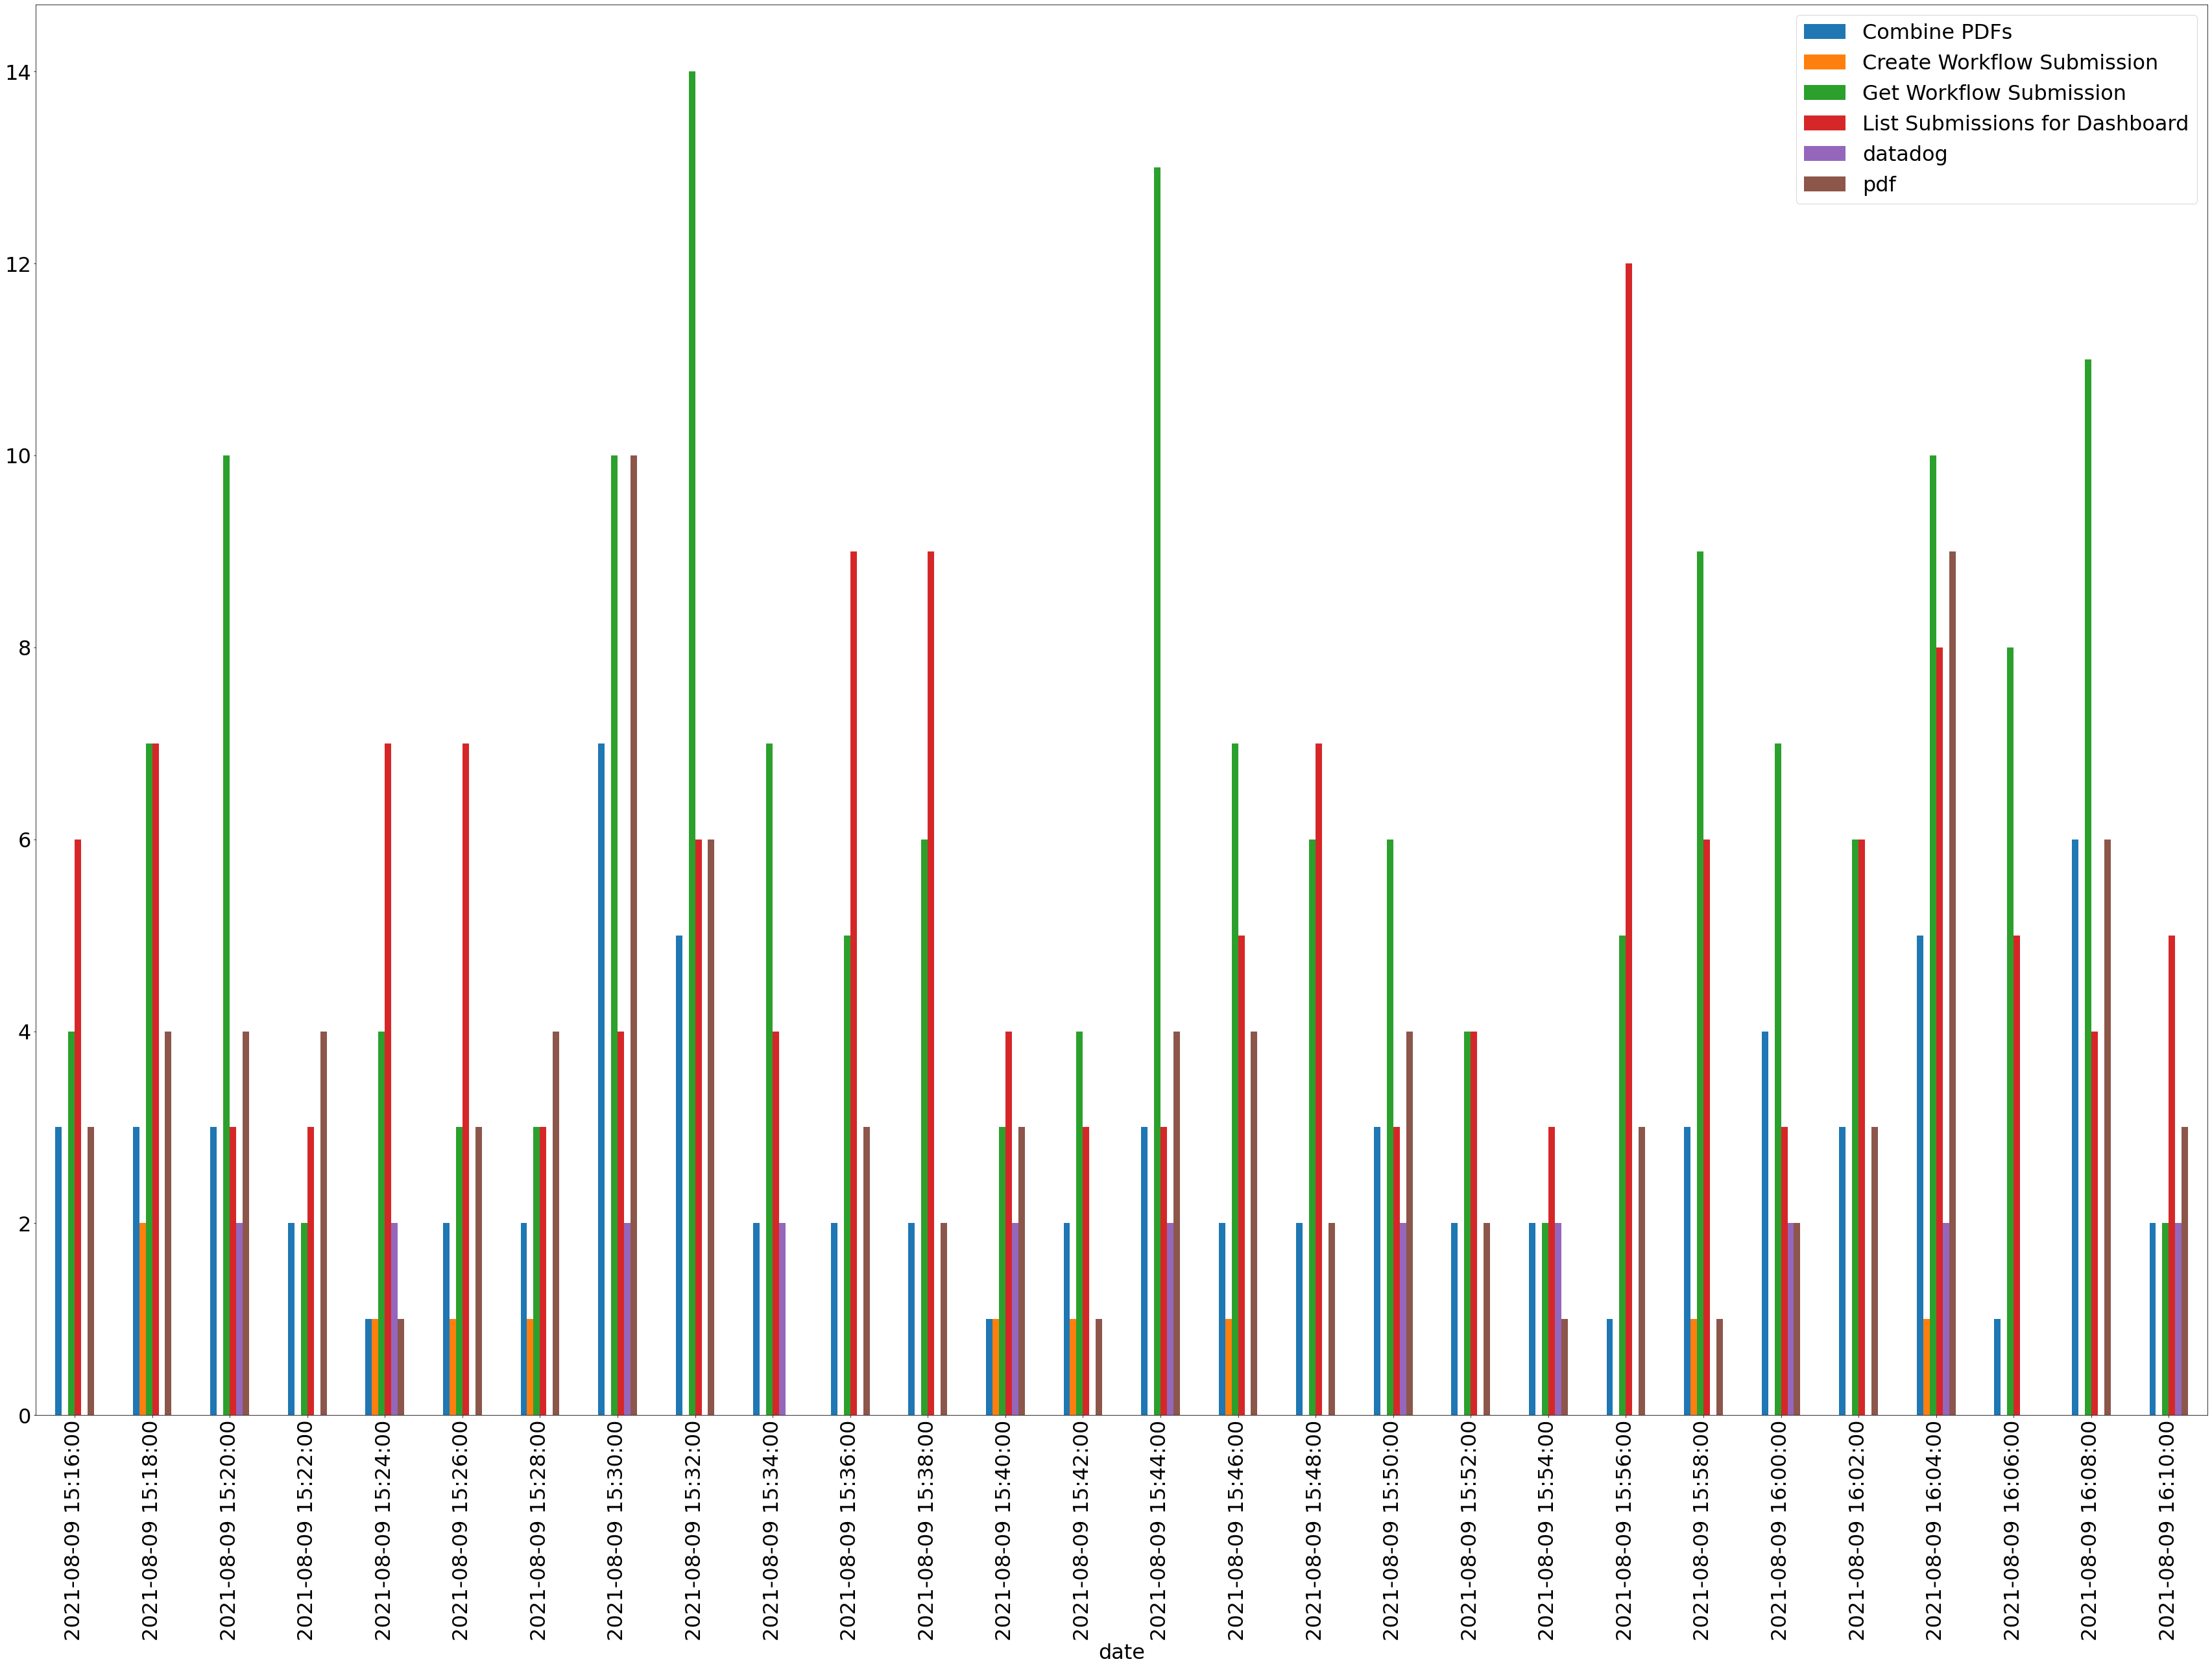

In [120]:
start_date = datetime(2021,8,9,15,15)
end_date = datetime(2021,8,9,16,10)
req_list = list(results.request_type.unique())
req_list = ['Combine PDFs','List Submissions for Dashboard','Create Workflow Submission','Get Workflow Submission','datadog','pdf']
chart2 = results.loc[(results.date>=start_date)&(results.date<=end_date)&(results.request_type.isin(req_list))]
chart2 = chart2.groupby(['client','env','date','request_type']).req_count.sum().reset_index()
chart2.pivot(index='date', columns='request_type', values='req_count').plot(kind='bar')
plt.rcParams["figure.figsize"] = (60,40)
plt.rcParams.update({'font.size': 32})
plt.xticks(rotation=90)
plt.legend()
plt.plot()

In [198]:
N=10
K=0
values=['req_count','pt_50']
dep_var = 'freeMem_rolling_diff'
columns = ['request_type']
indexes = ['client','env','date']
results3 = pd.pivot_table(results.loc[results.total_count>=K], values=values, index=indexes, 
        columns=columns, aggfunc='sum').fillna(0).reset_index()
cols = results3.columns
cols = [re.sub('---','-','-'.join(x)) for x in cols]
cols = [x.rstrip('-') for x in cols]
results3.columns = cols

columns2 = ['target_status_code2']
results3a = pd.pivot_table(results.loc[results.total_count>=K], values=values, index=indexes, 
        columns=columns2, aggfunc='sum').fillna(0).reset_index()
cols = results3a.columns
cols = [re.sub('---','-','-'.join(x)) for x in cols]
cols = [x.rstrip('-') for x in cols]
results3a.columns = cols

results3 = results3.merge(results3a, on=indexes, how='right').fillna(0)
results3 = results3.rename(columns=lambda x: re.sub('-','_',x))
results3 = results3.rename(columns=lambda x: re.sub(' ','_',x))
results3 = results3.rename(columns=lambda x: re.sub('[()]','',x))

req_vars = [x for x in results3.columns if x not in indexes]

mem['memDiff'] = mem.groupby(['client','env']).freeMem.apply(lambda x: x-x.shift(1)).fillna(0)
mem['diffBool'] = np.where(mem['memDiff']>=0,1,0)
mem['rollingDiff'] = mem.groupby(['client','env']).memDiff.apply(lambda x: x.rolling(N).sum().shift(-N))
mem['rollingDiffBool'] = mem.groupby(['client','env']).diffBool.apply(lambda x: x.rolling(N).mean().shift(-N))
mem2 = mem.loc[np.logical_not(mem.rollingDiff.isna())].copy()

results3 = results3.merge(mem2, on = indexes, how='right').fillna(0)

results3[req_vars] = results3[req_vars].apply(lambda x: x-x.shift(1)).fillna(0)
results3['outlier'] = iso.fit_predict(results3[req_vars+['rollingDiff']])
results3['low_mem'] = np.where(results3.rollingDiff <= results3.groupby(['client','env']).rollingDiff.quantile(.001)[0], 1, 0)
results3['low_mem_group'] = np.where((results3.low_mem==1)&(results3.low_mem.shift(-1)==0),1,0)
#results3['low_mem_group'] = results3.groupby(['client','env']).low_mem_group.cumsum() + 1
results3

client         env                date  pt_50_Combine_PDFs  \
0        axa  production 2021-08-01 00:00:00              0.0000   
1        axa  production 2021-08-01 00:02:00              0.1885   
2        axa  production 2021-08-01 00:04:00             -0.1885   
3        axa  production 2021-08-01 00:08:00              0.0000   
4        axa  production 2021-08-01 00:12:00              0.0000   
...      ...         ...                 ...                 ...   
22305    axa  production 2021-08-31 10:10:00              0.0000   
22306    axa  production 2021-08-31 10:24:00              0.0000   
22307    axa  production 2021-08-31 11:00:00              0.0000   
22308    axa  production 2021-08-31 11:04:00              0.0000   
22309    axa  production 2021-08-31 11:30:00              0.0000   

       pt_50_Convert_XML_to_JSON  pt_50_Create_Module_Submissions  \
0                            0.0                              0.0   
1                            0.0                              0.0   
2                            0.0                              0.0   
3                            0.0                              0.0   
4                            0.0                              0.0   
...                          ...                              ...   
22305                        0.0                              0.0   
22306                        0.0                              0.0   
22307                        0.0                              0.0   
22308                        0.0                              0.0   
22309                        0.0                              0.0   

       pt_50_Create_Workflow_Submission  pt_50_Delete_Workflow_Submission  \
0                                   0.0                               0.0   
1                                   0.0                               0.0   
2                                   0.0                               0.0   
3                                   0.0                               0.0   
4                                   0.0                               0.0   
...                                 ...                               ...   
22305                               0.0                               0.0   
22306                               0.0                               0.0   
22307                               0.0                               0.0   
22308                               0.0                               0.0   
22309                               0.0                               0.0   

       pt_50_Execute_Module  pt_50_Execute_Transform_with_Input_Data  ...  \
0                    0.0000                                   0.0000  ...   
1                   21.7485                                   0.0335  ...   
2                  -21.7485                                  -0.0335  ...   
3                    0.0000                                   0.0000  ...   
4                    0.0000                                   0.0000  ...   
...                     ...                                      ...  ...   
22305                0.0000                                   0.0000  ...   
22306                0.0000                                   0.0000  ...   
22307                0.0000                                   0.0000  ...   
22308                0.0000                                   0.0000  ...   
22309                0.0000                                   0.0000  ...   

       req_count_5   freeMem      client_env   memDiff  diffBool  rollingDiff  \
0              0.0  0.532108  axa-production  0.000000         1     0.001176   
1              0.0  0.530315  axa-production -0.001792         0     0.002960   
2              0.0  0.531502  axa-production  0.001187         1     0.001146   
3              0.0  0.532438  axa-production -0.000382         0    -0.000142   
4              0.0  0.532929  axa-production -0.000812         0    -0.005782   
...            ...      

In [185]:
results4 = results3.groupby(['low_mem'])[req_vars+['rollingDiff']].mean().transpose().reset_index().rename(columns={'index':'names',0:'normal_mem',1:'low_mem'})
#results4.loc[(results4.normal_mem!=0)|(results4.low_mem!=0)].head(30)
results4['sig_test'] = 0
for x in req_vars:
    welch = stats.ttest_ind(results3.loc[results3.low_mem==0][x],results3.loc[results3.low_mem==1][x],equal_var=False)
    results4.loc[results4['names']==x,'sig_test'] = welch.pvalue
results4['sig_test'] = results4.sig_test.fillna(1)
#results4.loc[results4.sig_test < .1]
results4['outlier_ratio'] = abs(results4.low_mem-results4.normal_mem)
results4.loc[(results4.normal_mem!=0)|(results4.low_mem!=0)].sort_values('outlier_ratio',ascending=(0)).head(30)

low_mem                                        names  normal_mem    low_mem  \
68                                       req_count_2    0.039305 -38.086957   
65                                           pt_50_4   -0.019689  19.078326   
15                  pt_50_Update_Workflow_Submission    0.017056 -16.526870   
45                                   req_count_Other    0.009064  -8.869565   
21                                      pt_50_module   -0.008664   8.395065   
57                                   req_count_query    0.006910  -6.695652   
11                     pt_50_Get_Workflow_Submission   -0.006401   6.202935   
6            pt_50_Execute_Transform_with_Input_Data   -0.005493   5.322478   
66                                           pt_50_5   -0.004611   4.468478   
5                               pt_50_Execute_Module   -0.004413   4.275783   
67                                         req_count   -0.003769   3.652174   
61                                req_count_workflow    0.003634  -3.521739   
19                                        pt_50_form   -0.003511   3.402370   
14                                       pt_50_Other    0.003312  -3.209326   
0                                 pt_50_Combine_PDFs   -0.002922   2.831065   
71                                       req_count_5   -0.002333   2.260870   
30                                    pt_50_workflow   -0.002299   2.227870   
3                   pt_50_Create_Workflow_Submission   -0.001952   1.891217   
16                               pt_50_authorization   -0.001887   1.828891   
37       req_count_Execute_Transform_with_Input_Data    0.001885  -1.826087   
58                                req_count_services    0.001705  -1.652174   
12              pt_50_List_Submissions_for_Dashboard   -0.001507   1.460500   
50                                    req_count_form    0.001481  -1.434783   
42                 req_count_Get_Workflow_Submission    0.001256  -1.217391   
36                          req_count_Execute_Module    0.001256  -1.217391   
23                                        pt_50_ping   -0.001211   1.173913   
26                                       pt_50_query   -0.001171   1.134370   
13                                        pt_50_NULL   -0.000960   0.930391   
70                                       req_count_4   -0.000987   0.913043   
47                           req_count_authorization    0.000942  -0.913043   

low_mem  sig_test  outlier_ratio  
68       0.081633      38.126262  
65       0.327640      19.098015  
15       0.277070      16.543925  
45       0.269392       8.878629  
21       0.167257       8.403729  
57       0.203087       6.702562  
11       0.374871       6.209336  
6        0.314567       5.327971  
66       0.327742       4.473090  
5        0.772765       4.280195  
67       0.447961       3.655943  
61       0.110605       3.525374  
19       0.230695       3.405881  
14       0.165009       3.212638  
0        0.127312       2.833987  
71       0.328063       2.263203  
30       0.766032       2.230169  
3        0.249087       1.893169  
16       0.317613       1.830779  
37       0.130658       1.827971  
58       0.230382       1.653879  
12       0.185537       1.462007  
50       0.313266       1.436263  
42       0.352906       1.218648  
36       0.561909       1.218648  
23       0.287510       1.175125  
26       0.219986       1.135540  
13       0.268842       0.931351  
70       0.282342       0.914031  
47       0.686592       0.913986

In [196]:
#results.loc[results.request_type=='Execute Module']
#results3.iloc[:,:8]
results3.loc[(results3.low_mem_group!=results3.low_mem_group.shift(-10))|(results3.low_mem_group!=results3.low_mem_group.shift(1))].head(20)

client         env                date  pt_50_Combine_PDFs  \
0       axa  production 2021-08-01 00:00:00              0.0000   
5333    axa  production 2021-08-09 15:48:00              0.0280   
5334    axa  production 2021-08-09 15:50:00             -0.1255   
5335    axa  production 2021-08-09 15:52:00              0.7625   
5336    axa  production 2021-08-09 15:54:00             -0.4185   
5337    axa  production 2021-08-09 15:56:00             -0.2950   
5338    axa  production 2021-08-09 15:58:00              0.0960   
5339    axa  production 2021-08-09 16:00:00             -0.0165   
5340    axa  production 2021-08-09 16:02:00             -0.2535   
5341    axa  production 2021-08-09 16:04:00              0.3340   
5342    axa  production 2021-08-09 16:06:00             -0.1810   
5343    axa  production 2021-08-09 16:08:00              0.2845   
5385    axa  production 2021-08-09 17:32:00              0.5900   
5386    axa  production 2021-08-09 17:34:00              0.0990   
5387    axa  production 2021-08-09 17:36:00             -0.0625   
5388    axa  production 2021-08-09 17:38:00             -0.0975   
5389    axa  production 2021-08-09 17:40:00             -0.2580   
5390    axa  production 2021-08-09 17:42:00              0.2720   
5391    axa  production 2021-08-09 17:44:00             -0.5430   
5392    axa  production 2021-08-09 17:46:00              0.0000   

      pt_50_Convert_XML_to_JSON  pt_50_Create_Module_Submissions  \
0                        0.0000                            0.000   
5333                    -0.0060                            0.000   
5334                    -0.0165                            0.000   
5335                     0.0000                            0.000   
5336                     0.0290                            0.000   
5337                     0.0020                            0.307   
5338                     0.0380                           -0.307   
5339                    -0.0690                            0.000   
5340                     0.0000                            0.000   
5341                     0.0535                            0.000   
5342                    -0.0375                            0.000   
5343                     0.0200                            0.000   
5385                    -0.0085                            0.000   
5386                    -0.0100                            0.000   
5387                    -0.0205                            0.000   
5388                    -0.0110                            0.000   
5389                    -0.0160                            0.000   
5390                     0.0000                            0.000   
5391                     0.0420                            0.370   
5392                    -0.0155                           -0.370   

      pt_50_Create_Workflow_Submission  pt_50_Delete_Workflow_Submission  \
0                               0.0000                             0.000   
5333                           -2.7980                             0.000   
5334                            0.0000                             0.000   
5335                            0.0000                             0.000   
5336                            0.0000                             0.000   
5337                            0.0000                             0.000   
5338                            1.1020                             0.000   
5339                           -1.1020                             0.000   
5340                            0.0000                             0.000   
5341                            0.6650                             0.000   
5342                           -0.6650                             0.000   
5343                            0.0000                             0.000   
5385                           -1.0685                             0.000   
5386                            0.3345                             0.214   
5387                        

In [201]:
mem

date   freeMem      client_env client         env  \
0     2021-08-01 00:00:00  0.532108  axa-production    axa  production   
1     2021-08-01 00:02:00  0.530315  axa-production    axa  production   
2     2021-08-01 00:04:00  0.531502  axa-production    axa  production   
3     2021-08-01 00:06:00  0.532820  axa-production    axa  production   
4     2021-08-01 00:08:00  0.532438  axa-production    axa  production   
...                   ...       ...             ...    ...         ...   
22315 2021-08-31 23:50:00  0.634078  axa-production    axa  production   
22316 2021-08-31 23:52:00  0.634555  axa-production    axa  production   
22317 2021-08-31 23:54:00  0.634753  axa-production    axa  production   
22318 2021-08-31 23:56:00  0.632483  axa-production    axa  production   
22319 2021-08-31 23:58:00  0.632459  axa-production    axa  production   

        memDiff  diffBool  rollingDiff  rollingDiffBool  
0      0.000000         1     0.001176              0.5  
1     -0.001792         0     0.002960              0.5  
2      0.001187         1     0.001146              0.4  
3      0.001318         1    -0.000368              0.3  
4     -0.000382         0    -0.000142              0.3  
...         ...       ...          ...              ...  
22315  0.001143         1          NaN              NaN  
22316  0.000477         1          NaN              NaN  
22317  0.000198         1          NaN              NaN  
22318 -0.002269         0          NaN              NaN  
22319 -0.000024         0          NaN              NaN  

[22320 rows x 9 columns]